# FailureSense – Data Preprocessing & Visual Analysis

Objective: 
- Analyze feature distributions
- Identify outliers and skewness
- Understand relationships between sensors and failure
- Make preprocessing decisions for modeling


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv(r"D:\FailureSense_MLProj\failuresense\data\raw\ai4i2020.csv")

In [3]:
df["Machine failure"].value_counts()


Machine failure
0    9661
1     339
Name: count, dtype: int64

In [4]:
df["Machine failure"].value_counts(normalize=True)


Machine failure
0    0.9661
1    0.0339
Name: proportion, dtype: float64

In [5]:
numeric_features = df.select_dtypes(include=np.number).columns
numeric_features


Index(['UDI', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')

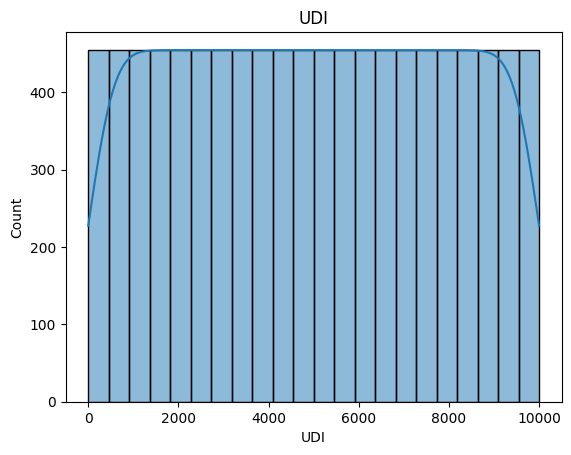

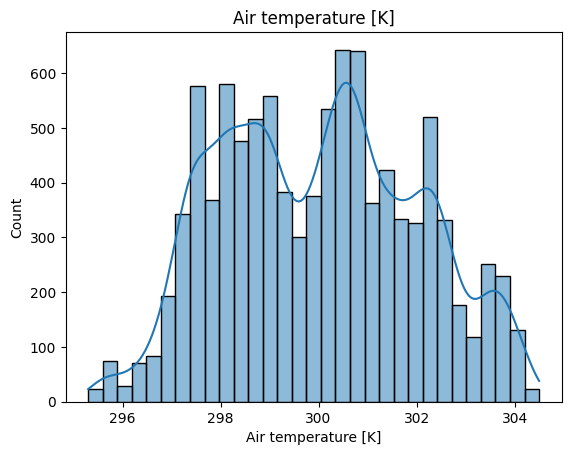

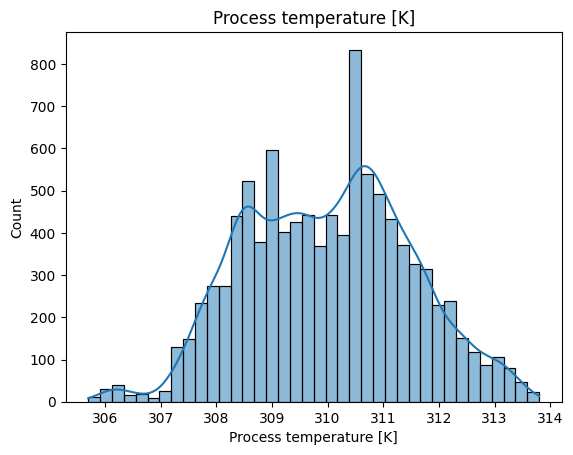

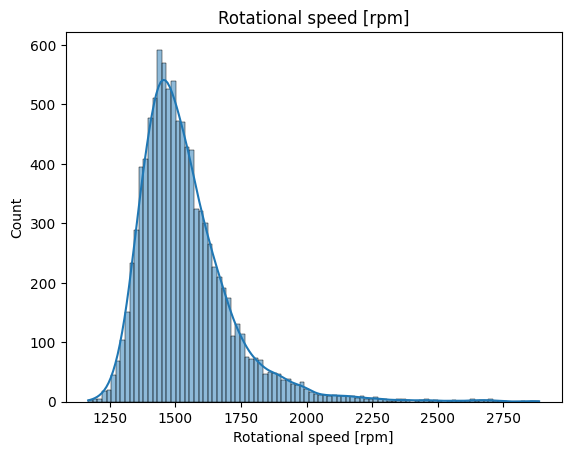

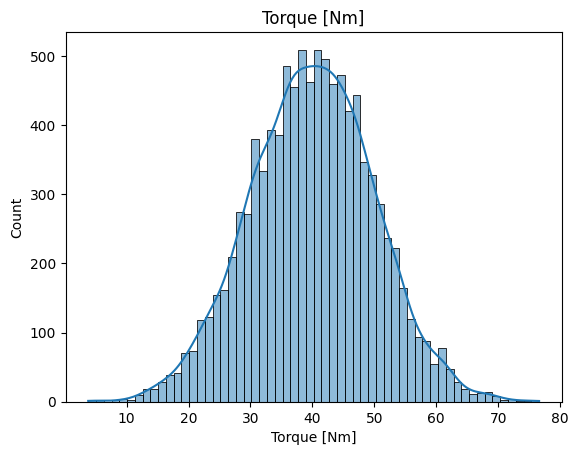

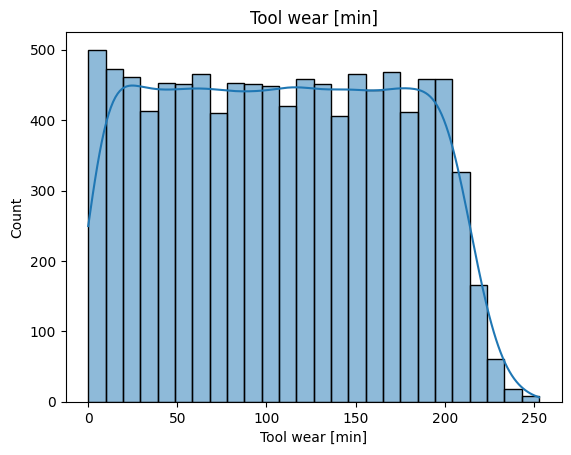

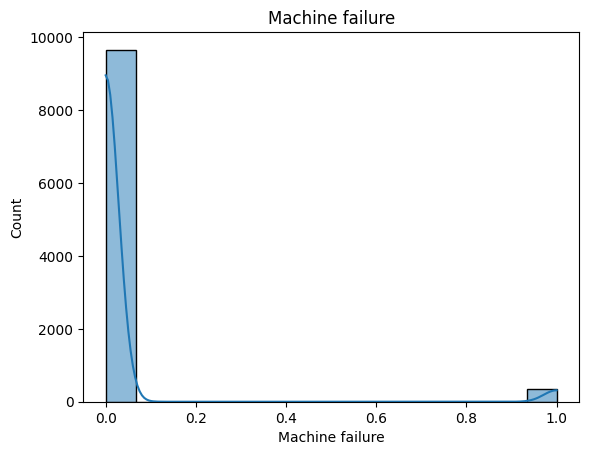

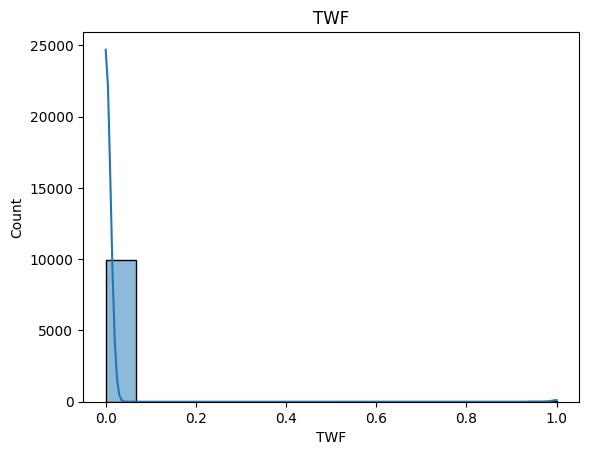

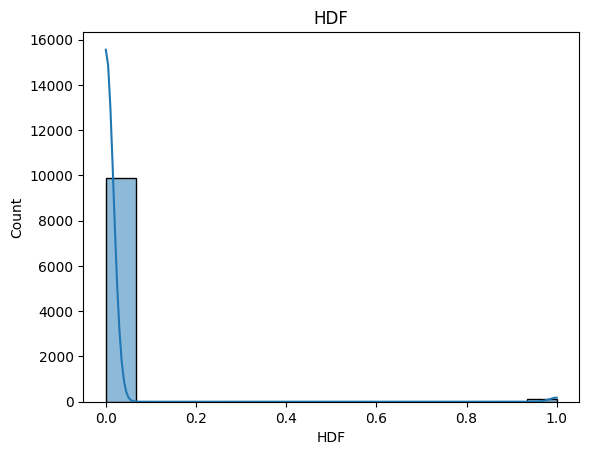

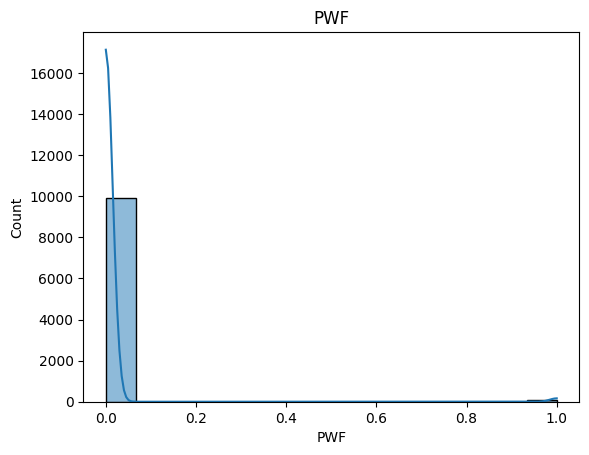

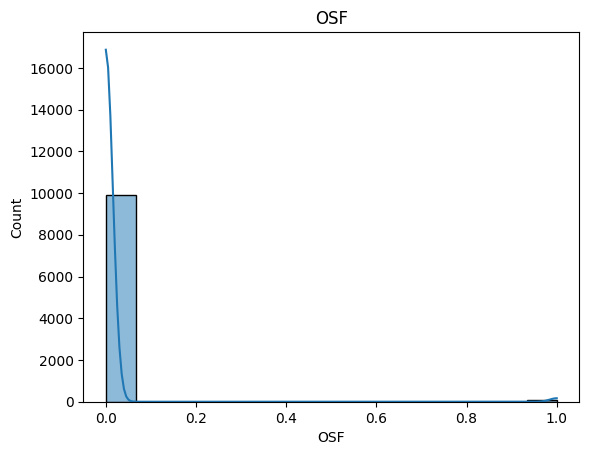

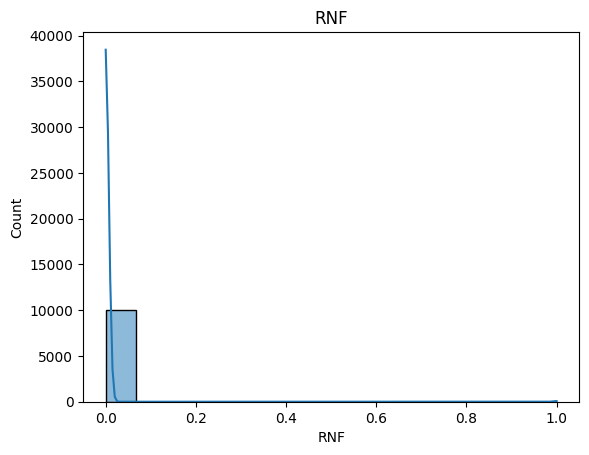

In [6]:
for col in numeric_features:
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(col)
    plt.show()


## Feature-Level Decisions (from Visual Analysis)

- UDI:
  - Uniform distribution
  - Acts as an identifier
  - Dropped from modeling

- Air temperature:
  - Approximately normal distribution
  - No extreme outliers
  - Retained and scaled

- Process temperature:
  - Slight right skew
  - Operationally meaningful variation
  - Retained and scaled

- Rotational speed:
  - Right-skewed with long tail
  - High values may indicate stress conditions
  - Retained and scaled, no outlier removal

- Torque:
  - Approximately normal distribution
  - Stable mechanical load indicator
  - Retained and scaled

- Tool wear:
  - Uniform distribution across lifecycle
  - Strong candidate for failure prediction
  - Retained and scaled

- Machine failure:
  - Highly imbalanced binary target
  - Failure events are rare
  - Accuracy is insufficient as an evaluation metric
  - Cost-sensitive evaluation is required

- Failure-type indicators (TWF, HDF, etc.):
  - Binary outcome variables
  - Extremely sparse positives
  - Not suitable as input features
  - Retained only for post-failure diagnosis and analysis

- TWF, HDF, PWF, OSF, RNF:
  - Binary indicators of specific failure modes
  - Extremely sparse positive cases
  - Represent outcomes, not predictive signals
  - Excluded from model input to prevent data leakage
  - Retained only for post-failure diagnostics and analysis


